In [1]:
from pynq import Overlay

import struct
import binascii

X_ADDRESS = 0x10
Y_ADDRESS = 0x18
R_ADDRESS = 0x20
THETA_ADDRESS = 0x30

In [2]:
ol = Overlay('./design_1.bit')

In [3]:
cart2pol_ip = ol.cordiccart2pol_0

In [4]:
x=0.6323
y=-0.2785

In [5]:
x=(struct.unpack('<I', struct.pack('<f', x))[0])
y=(struct.unpack('<I', struct.pack('<f', y))[0])

In [6]:
cart2pol_ip.write(X_ADDRESS,x)
cart2pol_ip.write(Y_ADDRESS,y)

In [7]:
r=hex(cart2pol_ip.read(R_ADDRESS))                     
r=r[2:]
theta=hex(cart2pol_ip.read(THETA_ADDRESS))
theta=theta[2:]

In [8]:
if r!=0:
    r=struct.unpack('>f', binascii.unhexlify(r))
    r=r[0]
if theta!=0:
    theta=struct.unpack('>f', binascii.unhexlify(theta))
    theta=theta[0]

In [9]:
print(r,theta)

0.6906288266181946 -0.41488680243492126


In [10]:
def cart2pol(x, y):
    # 数据类型转换
    x=(struct.unpack('<I', struct.pack('<f', x))[0])
    y=(struct.unpack('<I', struct.pack('<f', y))[0])
    
    cart2pol_ip.write(X_ADDRESS,x)
    cart2pol_ip.write(Y_ADDRESS,y)
    
    r=hex(cart2pol_ip.read(R_ADDRESS))                     
    r=r[2:]
    theta=hex(cart2pol_ip.read(THETA_ADDRESS))
    theta=theta[2:]
    
    if r!=0:
        r=struct.unpack('>f', binascii.unhexlify(r))
        r=r[0]
    if theta!=0:
        theta=struct.unpack('>f', binascii.unhexlify(theta))
        theta=theta[0]
        
    return r, theta

In [11]:
x=0.6323
y=-0.2785

In [12]:
 r, theta = cart2pol(x, y)

In [13]:
print(r,theta)

0.6906288266181946 -0.41488680243492126


## 测试

In [14]:
import random   
import cmath
import numpy as np

In [15]:
NUM_SAMPLES = 50

r_actual = np.zeros(NUM_SAMPLES)
theta_actual = np.zeros(NUM_SAMPLES)
r_predicted = np.zeros(NUM_SAMPLES)
theta_predicted = np.zeros(NUM_SAMPLES)

In [16]:
for i in range(NUM_SAMPLES):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    
    cn = complex(x,y)
    r_actual[i], theta_actual[i] = cmath.polar(cn)
    r_predicted[i], theta_predicted[i] = cart2pol(x, y)
    print(r_actual[i], r_predicted[i], theta_actual[i], theta_predicted[i])

1.20941060369 1.20890676975 2.4267984384 2.4268052578
0.984018364106 0.983608365059 0.261619026299 0.261631816626
1.02690886724 1.02648115158 -1.14214411134 -1.14211595058
0.717535617387 0.717236757278 -2.05931219434 -2.05933260918
0.36045536204 0.360305249691 2.08393332979 2.08391165733
0.908479326211 0.908100903034 -0.0200306796316 -0.0200455170125
0.423030888701 0.422854691744 -0.213634906992 -0.213661059737
0.599937273005 0.59968739748 0.336991179997 0.336967498064
0.663485777399 0.663209378719 0.426006469434 0.425995141268
0.993904693252 0.993490815163 -1.61427917724 -1.61427915096
0.271239177314 0.271126180887 -1.15176575399 -1.15175926685
0.515553058872 0.515338361263 1.65827347014 1.65827691555
1.01889039426 1.018466115 -0.923992285399 -0.923982143402
0.854648768421 0.854292809963 0.0356051357132 0.0356091596186
0.616202568335 0.615945875645 -0.150770151939 -0.150753781199
0.648433053611 0.648163080215 -2.70101776794 -2.70101046562
0.738475977924 0.738168358803 1.41090701863 1.

In [17]:
r_diff=np.subtract(r_actual,r_predicted)
r_square=np.square(r_diff)
r_mse=r_square.mean()
r_rmse=np.sqrt(r_mse)

In [18]:
theta_diff=np.subtract(theta_actual,theta_predicted)
theta_square=np.square(theta_diff)
theta_mse=theta_square.mean()
theta_rmse=np.sqrt(theta_mse)

In [19]:
print("Radius RMSE: ", r_rmse, "Theta RMSE:", theta_rmse)    
if r_rmse<0.001 and theta_rmse<0.001:
    print("PASS")
else:
    print("FAIL")

Radius RMSE:  0.000337246800471 Theta RMSE: 1.82042317846e-05
PASS


In [20]:
import matplotlib.pyplot as plt

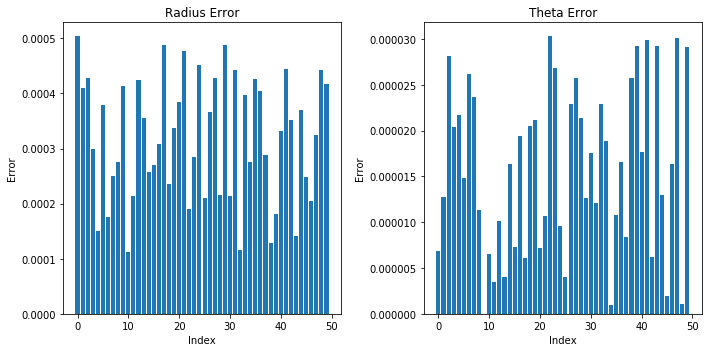

In [21]:
ind=np.arange(NUM_SAMPLES)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(ind,abs(r_diff))
plt.title("Radius Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(ind,abs(theta_diff))
plt.title("Theta Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()